In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%ls
%cd CNNtention/

CNNtention/  assignment4/  examples/  getting_started.ipynb*
/teamspace/studios/this_studio/CNNtention


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [3]:
import pipeline_template, mlflow, torch, torchvision
from experiment_configs import configs, ExperimentConfig, ModelConfig, DataConfig
from models.resnet_cbam import ResnetCBAM
from models.original_basic_block import OriginalBasicBlock
from skorch.callbacks import LRScheduler
from skorch.dataset import ValidSplit
from torch.optim.lr_scheduler import MultiStepLR
from torchvision.transforms import transforms
mlflow.set_tracking_uri('file:./mlruns')

In [4]:
config={"cbam_resnet20_tuning": lambda: ExperimentConfig(
        "CBAM Attention ResNet20 Tuning",
        DataConfig(name='CIFAR-10',
                   test_size=10000,
                   train_transform=transforms.Compose([
                transforms.RandomHorizontalFlip(0.5),
                transforms.RandomCrop(32, padding=4),
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.4918687901200927, 0.49185976472299225, 0.4918583862227116], std=[0.24697121702736, 0.24696766978537033, 0.2469719877121087])
            ]),
            test_transform=transforms.Compose([
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.4918687901200927, 0.49185976472299225, 0.4918583862227116], std=[0.24697121702736, 0.24696766978537033, 0.2469719877121087])
            ])),
        ModelConfig(model=ResnetCBAM(OriginalBasicBlock, [3,3,3], 10),
                    lr=0.0005,
                    optimizer=torch.optim.Adam,
                    weight_decay=0.0001,
                    use_reg=True,
                    batch_size=128,
                    max_epochs=64000//(45000 // 128),
                    momentum=0.9,
                    train_split=ValidSplit(cv=0.1),
                    scheduler=LRScheduler(
                        policy=MultiStepLR,
                        milestones=[
                            32000 // (45000 // 128), # == 91
                            48000 // (45000 // 128) # == 136
                        ],
                        gamma=0.1 # this is the multiplication factor ("divide it by 10")
                    ),
                    log_model=True,
                    use_early_stopping=False,
                    add_test_set_eval=False,
                    )
    )}

2024/12/07 12:33:08 INFO mlflow.tracking.fluent: Experiment with name 'cbam_attention_resnet20_tuning' does not exist. Creating a new experiment.


=== Model Details ===
ResnetCBAM(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU()
  (layer1): Sequential(
    (0): OriginalBasicBlock(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU()
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu2): ReLU()
    )
    (1): OriginalBasicBlock(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU()
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1

Files already downloaded and verified
Files already downloaded and verified


  0%|          | 0/392 [00:00<?, ?it/s]

  epoch    train_err    train_loss    valid_acc    valid_err    valid_loss      lr      dur
-------  -----------  ------------  -----------  -----------  ------------  ------  -------
      1      53.7978        1.9476       0.4614       0.5386        1.4590  0.0005  34.6814


  0%|          | 0/392 [00:00<?, ?it/s]

      2      48.4889        1.3665       0.4998       0.5002        1.3786  0.0005  33.1101


  0%|          | 0/392 [00:00<?, ?it/s]

      3      39.2644        1.1642       0.6036       0.3964        1.1330  0.0005  31.8360


  0%|          | 0/392 [00:00<?, ?it/s]

      4      39.8711        1.0339       0.5906       0.4094        1.1666  0.0005  32.2035


  0%|          | 0/392 [00:00<?, ?it/s]

      5      34.3289        0.9345       0.6492       0.3508        1.0287  0.0005  31.6977


  0%|          | 0/392 [00:00<?, ?it/s]

      6      31.6778        0.8523       0.6822       0.3178        0.9336  0.0005  32.4071


  0%|          | 0/392 [00:00<?, ?it/s]

      7      27.6022        0.7832       0.7032       0.2968        0.8365  0.0005  31.9784


  0%|          | 0/392 [00:00<?, ?it/s]

      8      27.9333        0.7271       0.7068       0.2932        0.8326  0.0005  31.8499


  0%|          | 0/392 [00:00<?, ?it/s]

      9      25.5822        0.6868       0.7282       0.2718        0.7774  0.0005  30.4273


  0%|          | 0/392 [00:00<?, ?it/s]

     10      23.3889        0.6466       0.7406       0.2594        0.7349  0.0005  31.2848


  0%|          | 0/392 [00:00<?, ?it/s]

     11      22.9422        0.6173       0.7522       0.2478        0.7320  0.0005  30.5109


  0%|          | 0/392 [00:00<?, ?it/s]

     12      20.6467        0.5890       0.7624       0.2376        0.6746  0.0005  31.8083


  0%|          | 0/392 [00:00<?, ?it/s]

     13      19.9244        0.5615       0.7756       0.2244        0.6761  0.0005  32.0877


  0%|          | 0/392 [00:00<?, ?it/s]

     14      20.4556        0.5524       0.7780       0.2220        0.6686  0.0005  31.5163


  0%|          | 0/392 [00:00<?, ?it/s]

     15      18.9044        0.5319       0.7836       0.2164        0.6438  0.0005  32.1233


  0%|          | 0/392 [00:00<?, ?it/s]

     16      18.8378        0.5098       0.7880       0.2120        0.6383  0.0005  30.0875


  0%|          | 0/392 [00:00<?, ?it/s]

     17      16.2600        0.4895       0.7998       0.2002        0.5734  0.0005  31.4988


  0%|          | 0/392 [00:00<?, ?it/s]

     18      16.3667        0.4740       0.8042       0.1958        0.5914  0.0005  31.9891


  0%|          | 0/392 [00:00<?, ?it/s]

     19      18.7778        0.4582       0.7848       0.2152        0.6615  0.0005  30.9942


  0%|          | 0/392 [00:00<?, ?it/s]

     20      15.7667        0.4512       0.8018       0.1982        0.5782  0.0005  30.5483


  0%|          | 0/392 [00:00<?, ?it/s]

     21      15.9000        0.4368       0.8098       0.1902        0.5724  0.0005  30.4071


  0%|          | 0/392 [00:00<?, ?it/s]

     22      18.5378        0.4245       0.7790       0.2210        0.6493  0.0005  30.2538


  0%|          | 0/392 [00:00<?, ?it/s]

     23      17.4844        0.4086       0.7900       0.2100        0.6184  0.0005  30.2270


  0%|          | 0/392 [00:00<?, ?it/s]

     24      15.0111        0.4012       0.8076       0.1924        0.5661  0.0005  31.2704


  0%|          | 0/392 [00:00<?, ?it/s]

     25      16.7089        0.3936       0.7978       0.2022        0.6085  0.0005  32.0210


  0%|          | 0/392 [00:00<?, ?it/s]

     26      15.4911        0.3768       0.7962       0.2038        0.6009  0.0005  30.4373


  0%|          | 0/392 [00:00<?, ?it/s]

     27      13.2289        0.3777       0.8252       0.1748        0.5345  0.0005  31.6270


  0%|          | 0/392 [00:00<?, ?it/s]

     28      13.8511        0.3658       0.8160       0.1840        0.5533  0.0005  32.2328


  0%|          | 0/392 [00:00<?, ?it/s]

     29      16.2067        0.3522       0.7932       0.2068        0.6263  0.0005  32.3506


  0%|          | 0/392 [00:00<?, ?it/s]

     30      12.5578        0.3431       0.8288       0.1712        0.5363  0.0005  30.4816


  0%|          | 0/392 [00:00<?, ?it/s]

     31      12.2156        0.3387       0.8264       0.1736        0.5167  0.0005  31.7242


  0%|          | 0/392 [00:00<?, ?it/s]

     32      11.0000        0.3324       0.8334       0.1666        0.4973  0.0005  32.1947


  0%|          | 0/392 [00:00<?, ?it/s]

     33      12.0378        0.3261       0.8222       0.1778        0.5322  0.0005  32.9058


  0%|          | 0/392 [00:00<?, ?it/s]

     34      12.3222        0.3199       0.8222       0.1778        0.5261  0.0005  30.2615


  0%|          | 0/392 [00:00<?, ?it/s]

     35      12.8622        0.3135       0.8220       0.1780        0.5534  0.0005  30.9672


  0%|          | 0/392 [00:00<?, ?it/s]

     36      10.8156        0.3041       0.8382       0.1618        0.5043  0.0005  31.8783


  0%|          | 0/392 [00:00<?, ?it/s]

     37      12.4022        0.2983       0.8256       0.1744        0.5539  0.0005  32.0615


  0%|          | 0/392 [00:00<?, ?it/s]

     38       9.7511        0.2947       0.8506       0.1494        0.4627  0.0005  30.2711


  0%|          | 0/392 [00:00<?, ?it/s]

     39      10.5044        0.2863       0.8414       0.1586        0.5069  0.0005  30.1766


  0%|          | 0/392 [00:00<?, ?it/s]

     40      10.8289        0.2811       0.8302       0.1698        0.5215  0.0005  31.3758


  0%|          | 0/392 [00:00<?, ?it/s]

     41      11.0778        0.2816       0.8358       0.1642        0.5276  0.0005  32.2359


  0%|          | 0/392 [00:00<?, ?it/s]

     42       9.9844        0.2721       0.8408       0.1592        0.5051  0.0005  31.5470


  0%|          | 0/392 [00:00<?, ?it/s]

     43      10.5867        0.2701       0.8402       0.1598        0.5358  0.0005  31.6973


  0%|          | 0/392 [00:00<?, ?it/s]

     44       8.8133        0.2603       0.8528       0.1472        0.4655  0.0005  30.7751


  0%|          | 0/392 [00:00<?, ?it/s]

     45       9.6667        0.2571       0.8408       0.1592        0.5286  0.0005  30.2290


  0%|          | 0/392 [00:00<?, ?it/s]

     46       8.5089        0.2554       0.8472       0.1528        0.4653  0.0005  31.1109


  0%|          | 0/392 [00:00<?, ?it/s]

     47       8.8511        0.2464       0.8506       0.1494        0.4706  0.0005  32.2743


  0%|          | 0/392 [00:00<?, ?it/s]

     48      10.4911        0.2438       0.8314       0.1686        0.5580  0.0005  30.3512


  0%|          | 0/392 [00:00<?, ?it/s]

     49       9.3089        0.2396       0.8470       0.1530        0.5027  0.0005  31.3358


  0%|          | 0/392 [00:00<?, ?it/s]

     50       8.9911        0.2379       0.8416       0.1584        0.5242  0.0005  30.7580


  0%|          | 0/392 [00:00<?, ?it/s]

     51      11.0889        0.2320       0.8290       0.1710        0.5556  0.0005  32.8257


  0%|          | 0/392 [00:00<?, ?it/s]

     52       7.4356        0.2237       0.8540       0.1460        0.4657  0.0005  32.9261


  0%|          | 0/392 [00:00<?, ?it/s]

     53       8.0600        0.2212       0.8538       0.1462        0.4887  0.0005  32.2494


  0%|          | 0/392 [00:00<?, ?it/s]

     54       8.9733        0.2180       0.8354       0.1646        0.5322  0.0005  30.9988


  0%|          | 0/392 [00:00<?, ?it/s]

     55      11.0867        0.2174       0.8286       0.1714        0.5960  0.0005  31.8597


  0%|          | 0/392 [00:00<?, ?it/s]

     56       7.4311        0.2149       0.8482       0.1518        0.4871  0.0005  31.9129


  0%|          | 0/392 [00:00<?, ?it/s]

     57       7.0622        0.2109       0.8536       0.1464        0.4779  0.0005  31.3906


  0%|          | 0/392 [00:00<?, ?it/s]

     58       8.6911        0.2021       0.8454       0.1546        0.5286  0.0005  32.0546


  0%|          | 0/392 [00:00<?, ?it/s]

     59       8.6133        0.2064       0.8426       0.1574        0.5278  0.0005  30.4251


  0%|          | 0/392 [00:00<?, ?it/s]

     60       8.4356        0.2022       0.8450       0.1550        0.5228  0.0005  31.4152


  0%|          | 0/392 [00:00<?, ?it/s]

     61       7.3000        0.1961       0.8554       0.1446        0.4987  0.0005  30.5782


  0%|          | 0/392 [00:00<?, ?it/s]

     62       8.2644        0.1937       0.8428       0.1572        0.5359  0.0005  31.1577


  0%|          | 0/392 [00:00<?, ?it/s]

     63       6.6867        0.1949       0.8544       0.1456        0.4707  0.0005  31.0078


  0%|          | 0/392 [00:00<?, ?it/s]

     64       6.4800        0.1860       0.8572       0.1428        0.4970  0.0005  31.1295


  0%|          | 0/392 [00:00<?, ?it/s]

     65       7.0044        0.1896       0.8470       0.1530        0.4942  0.0005  31.7689


  0%|          | 0/392 [00:00<?, ?it/s]

     66       6.7111        0.1784       0.8598       0.1402        0.5103  0.0005  32.3821


  0%|          | 0/392 [00:00<?, ?it/s]

     67       6.9178        0.1817       0.8532       0.1468        0.5027  0.0005  30.8315


  0%|          | 0/392 [00:00<?, ?it/s]

     68       6.6733        0.1779       0.8558       0.1442        0.4828  0.0005  32.1720


  0%|          | 0/392 [00:00<?, ?it/s]

     69       6.4444        0.1779       0.8508       0.1492        0.5012  0.0005  31.8149


  0%|          | 0/392 [00:00<?, ?it/s]

     70       7.1889        0.1721       0.8488       0.1512        0.5421  0.0005  31.7566


  0%|          | 0/392 [00:00<?, ?it/s]

     71       5.9222        0.1768       0.8584       0.1416        0.4792  0.0005  30.6293


  0%|          | 0/392 [00:00<?, ?it/s]

     72       6.4978        0.1701       0.8570       0.1430        0.5102  0.0005  31.3347


  0%|          | 0/392 [00:00<?, ?it/s]

     73       5.9022        0.1666       0.8544       0.1456        0.5078  0.0005  32.3867


  0%|          | 0/392 [00:00<?, ?it/s]

     74       5.9644        0.1637       0.8590       0.1410        0.4821  0.0005  32.3346


  0%|          | 0/392 [00:00<?, ?it/s]

     75       6.3356        0.1660       0.8524       0.1476        0.5106  0.0005  32.0134


  0%|          | 0/392 [00:00<?, ?it/s]

     76       7.1711        0.1581       0.8536       0.1464        0.5282  0.0005  31.2289


  0%|          | 0/392 [00:00<?, ?it/s]

     77       6.5156        0.1615       0.8554       0.1446        0.4904  0.0005  31.7974


  0%|          | 0/392 [00:00<?, ?it/s]

     78       6.9133        0.1602       0.8476       0.1524        0.5557  0.0005  30.6177


  0%|          | 0/392 [00:00<?, ?it/s]

     79       8.4911        0.1606       0.8392       0.1608        0.5833  0.0005  30.3521


  0%|          | 0/392 [00:00<?, ?it/s]

     80       7.6044        0.1491       0.8368       0.1632        0.5941  0.0005  32.0973


  0%|          | 0/392 [00:00<?, ?it/s]

     81       6.5244        0.1515       0.8570       0.1430        0.5314  0.0005  32.7999


  0%|          | 0/392 [00:00<?, ?it/s]

     82       6.2689        0.1515       0.8562       0.1438        0.5133  0.0005  30.4810


  0%|          | 0/392 [00:00<?, ?it/s]

     83       5.7600        0.1453       0.8556       0.1444        0.5220  0.0005  32.0441


  0%|          | 0/392 [00:00<?, ?it/s]

     84       6.1489        0.1453       0.8558       0.1442        0.5563  0.0005  30.4160


  0%|          | 0/392 [00:00<?, ?it/s]

     85       5.5822        0.1475       0.8570       0.1430        0.5469  0.0005  31.0729


  0%|          | 0/392 [00:00<?, ?it/s]

     86       5.3400        0.1414       0.8594       0.1406        0.4987  0.0005  31.2112


  0%|          | 0/392 [00:00<?, ?it/s]

     87       4.9867        0.1430       0.8650       0.1350        0.4864  0.0005  32.0394


  0%|          | 0/392 [00:00<?, ?it/s]

     88      10.2956        0.1390       0.8210       0.1790        0.7383  0.0005  30.2942


  0%|          | 0/392 [00:00<?, ?it/s]

     89       5.0289        0.1401       0.8596       0.1404        0.5069  0.0005  30.3073


  0%|          | 0/392 [00:00<?, ?it/s]

     90       5.3111        0.1402       0.8622       0.1378        0.4836  0.0005  30.0619


  0%|          | 0/392 [00:00<?, ?it/s]

     91       6.1489        0.1361       0.8616       0.1384        0.5408  0.0005  31.3039


  0%|          | 0/392 [00:00<?, ?it/s]

     92       2.4311        0.0922       0.8808       0.1192        0.4269  0.0001  30.2102


  0%|          | 0/392 [00:00<?, ?it/s]

     93       1.8889        0.0751       0.8846       0.1154        0.4199  0.0001  30.2642


  0%|          | 0/392 [00:00<?, ?it/s]

     94       1.7667        0.0719       0.8830       0.1170        0.4240  0.0001  30.6849


  0%|          | 0/392 [00:00<?, ?it/s]

     95       1.7622        0.0689       0.8762       0.1238        0.4458  0.0001  31.3218


  0%|          | 0/392 [00:00<?, ?it/s]

     96       1.5556        0.0639       0.8856       0.1144        0.4224  0.0001  31.6454


  0%|          | 0/392 [00:00<?, ?it/s]

     97       1.5244        0.0628       0.8816       0.1184        0.4513  0.0001  31.4568


  0%|          | 0/392 [00:00<?, ?it/s]

     98       1.3200        0.0602       0.8832       0.1168        0.4352  0.0001  30.6532


  0%|          | 0/392 [00:00<?, ?it/s]

     99       1.4444        0.0607       0.8912       0.1088        0.4260  0.0001  30.2089


  0%|          | 0/392 [00:00<?, ?it/s]

    100       1.3289        0.0567       0.8812       0.1188        0.4404  0.0001  30.3424


  0%|          | 0/392 [00:00<?, ?it/s]

    101       1.3044        0.0581       0.8796       0.1204        0.4606  0.0001  30.4190


  0%|          | 0/392 [00:00<?, ?it/s]

    102       1.3489        0.0548       0.8804       0.1196        0.4658  0.0001  32.0760


  0%|          | 0/392 [00:00<?, ?it/s]

    103       1.2556        0.0532       0.8836       0.1164        0.4542  0.0001  30.8255


  0%|          | 0/392 [00:00<?, ?it/s]

    104       1.3067        0.0535       0.8874       0.1126        0.4494  0.0001  31.8581


  0%|          | 0/392 [00:00<?, ?it/s]

    105       1.2422        0.0502       0.8824       0.1176        0.4726  0.0001  31.9568


  0%|          | 0/392 [00:00<?, ?it/s]

    106       1.2067        0.0499       0.8834       0.1166        0.4699  0.0001  31.9387


  0%|          | 0/392 [00:00<?, ?it/s]

    107       1.2067        0.0502       0.8838       0.1162        0.4771  0.0001  30.5208


  0%|          | 0/392 [00:00<?, ?it/s]

    108       1.2556        0.0496       0.8862       0.1138        0.4695  0.0001  30.7803


  0%|          | 0/392 [00:00<?, ?it/s]

    109       1.0889        0.0473       0.8800       0.1200        0.4826  0.0001  32.0914


  0%|          | 0/392 [00:00<?, ?it/s]

    110       1.0622        0.0470       0.8852       0.1148        0.4750  0.0001  31.1804


  0%|          | 0/392 [00:00<?, ?it/s]

    111       1.0333        0.0476       0.8842       0.1158        0.4621  0.0001  32.7284


  0%|          | 0/392 [00:00<?, ?it/s]

    112       0.9911        0.0446       0.8860       0.1140        0.4676  0.0001  30.6689


  0%|          | 0/392 [00:00<?, ?it/s]

    113       0.9711        0.0451       0.8830       0.1170        0.4758  0.0001  32.1140


  0%|          | 0/392 [00:00<?, ?it/s]

    114       1.0267        0.0438       0.8806       0.1194        0.4834  0.0001  30.6020


  0%|          | 0/392 [00:00<?, ?it/s]

    115       0.9911        0.0439       0.8812       0.1188        0.5057  0.0001  30.3262


  0%|          | 0/392 [00:00<?, ?it/s]

    116       1.0222        0.0428       0.8792       0.1208        0.4845  0.0001  30.9940


  0%|          | 0/392 [00:00<?, ?it/s]

    117       0.9756        0.0434       0.8834       0.1166        0.4769  0.0001  30.5325


  0%|          | 0/392 [00:00<?, ?it/s]

    118       0.9822        0.0417       0.8890       0.1110        0.4824  0.0001  31.6931


  0%|          | 0/392 [00:00<?, ?it/s]

    119       1.1222        0.0412       0.8812       0.1188        0.5077  0.0001  31.8427


  0%|          | 0/392 [00:00<?, ?it/s]

    120       0.9222        0.0408       0.8854       0.1146        0.4838  0.0001  31.7697


  0%|          | 0/392 [00:00<?, ?it/s]

    121       0.8844        0.0404       0.8874       0.1126        0.4871  0.0001  30.3154


  0%|          | 0/392 [00:00<?, ?it/s]

    122       0.9067        0.0403       0.8832       0.1168        0.4746  0.0001  31.4700


  0%|          | 0/392 [00:00<?, ?it/s]

    123       0.9444        0.0405       0.8904       0.1096        0.4766  0.0001  32.8167


  0%|          | 0/392 [00:00<?, ?it/s]

    124       0.8711        0.0391       0.8822       0.1178        0.5123  0.0001  32.2390


  0%|          | 0/392 [00:00<?, ?it/s]

    125       0.8378        0.0384       0.8790       0.1210        0.5069  0.0001  31.3481


  0%|          | 0/392 [00:00<?, ?it/s]

    126       0.8644        0.0391       0.8832       0.1168        0.5132  0.0001  30.9497


  0%|          | 0/392 [00:00<?, ?it/s]

    127       0.8044        0.0398       0.8882       0.1118        0.4772  0.0001  31.0940


  0%|          | 0/392 [00:00<?, ?it/s]

    128       0.8889        0.0385       0.8874       0.1126        0.4942  0.0001  32.4461


  0%|          | 0/392 [00:00<?, ?it/s]

    129       0.8622        0.0393       0.8836       0.1164        0.5175  0.0001  31.5033


  0%|          | 0/392 [00:00<?, ?it/s]

    130       0.8000        0.0372       0.8832       0.1168        0.4907  0.0001  30.5984


  0%|          | 0/392 [00:00<?, ?it/s]

    131       0.8444        0.0363       0.8824       0.1176        0.5199  0.0001  30.2801


  0%|          | 0/392 [00:00<?, ?it/s]

    132       0.7711        0.0376       0.8824       0.1176        0.5023  0.0001  31.7961


  0%|          | 0/392 [00:00<?, ?it/s]

    133       0.7289        0.0357       0.8820       0.1180        0.5002  0.0001  31.9293


  0%|          | 0/392 [00:00<?, ?it/s]

    134       0.6956        0.0347       0.8818       0.1182        0.5269  0.0001  31.9277


  0%|          | 0/392 [00:00<?, ?it/s]

    135       0.6822        0.0343       0.8850       0.1150        0.5168  0.0001  31.5126


  0%|          | 0/392 [00:00<?, ?it/s]

    136       0.7289        0.0333       0.8812       0.1188        0.5190  0.0001  31.9808


  0%|          | 0/392 [00:00<?, ?it/s]

    137       0.6667        0.0328       0.8792       0.1208        0.5204  0.0000  32.0438


  0%|          | 0/392 [00:00<?, ?it/s]

    138       0.6244        0.0315       0.8866       0.1134        0.4949  0.0000  32.7502


  0%|          | 0/392 [00:00<?, ?it/s]

    139       0.6444        0.0321       0.8822       0.1178        0.5095  0.0000  31.1872


  0%|          | 0/392 [00:00<?, ?it/s]

    140       0.5978        0.0309       0.8846       0.1154        0.4807  0.0000  30.4198


  0%|          | 0/392 [00:00<?, ?it/s]

    141       0.6733        0.0310       0.8816       0.1184        0.4956  0.0000  32.1675


  0%|          | 0/392 [00:00<?, ?it/s]

    142       0.6667        0.0301       0.8876       0.1124        0.5007  0.0000  30.7992


  0%|          | 0/392 [00:00<?, ?it/s]

    143       0.5889        0.0311       0.8810       0.1190        0.5197  0.0000  31.3816


  0%|          | 0/392 [00:00<?, ?it/s]

    144       0.5867        0.0318       0.8864       0.1136        0.5132  0.0000  32.6761


  0%|          | 0/392 [00:00<?, ?it/s]

    145       0.5800        0.0308       0.8820       0.1180        0.5333  0.0000  31.7101


  0%|          | 0/392 [00:00<?, ?it/s]

    146       0.5711        0.0295       0.8850       0.1150        0.5069  0.0000  31.9628


  0%|          | 0/392 [00:00<?, ?it/s]

    147       0.6067        0.0279       0.8892       0.1108        0.5074  0.0000  31.6462


  0%|          | 0/392 [00:00<?, ?it/s]

    148       0.5889        0.0284       0.8826       0.1174        0.5200  0.0000  31.2893


  0%|          | 0/392 [00:00<?, ?it/s]

    149       0.5733        0.0300       0.8860       0.1140        0.5334  0.0000  31.4484


  0%|          | 0/392 [00:00<?, ?it/s]

    150       0.6200        0.0289       0.8838       0.1162        0.5211  0.0000  30.6061


  0%|          | 0/392 [00:00<?, ?it/s]

    151       0.5800        0.0300       0.8818       0.1182        0.5196  0.0000  31.6651


  0%|          | 0/392 [00:00<?, ?it/s]

    152       0.5378        0.0304       0.8824       0.1176        0.5332  0.0000  32.1797


  0%|          | 0/392 [00:00<?, ?it/s]

    153       0.5978        0.0281       0.8820       0.1180        0.5300  0.0000  32.6208


  0%|          | 0/392 [00:00<?, ?it/s]

    154       0.5756        0.0294       0.8878       0.1122        0.4848  0.0000  31.3980


  0%|          | 0/392 [00:00<?, ?it/s]

    155       0.5067        0.0292       0.8810       0.1190        0.5145  0.0000  31.7350


  0%|          | 0/392 [00:00<?, ?it/s]

    156       0.5644        0.0305       0.8876       0.1124        0.5090  0.0000  31.4669


  0%|          | 0/392 [00:00<?, ?it/s]

    157       0.5844        0.0280       0.8846       0.1154        0.5303  0.0000  31.9894


  0%|          | 0/392 [00:00<?, ?it/s]

    158       0.5333        0.0287       0.8814       0.1186        0.5300  0.0000  30.7971


  0%|          | 0/392 [00:00<?, ?it/s]

    159       0.5867        0.0289       0.8814       0.1186        0.5237  0.0000  31.5120


  0%|          | 0/392 [00:00<?, ?it/s]

    160       0.6422        0.0293       0.8892       0.1108        0.4957  0.0000  30.6598


  0%|          | 0/392 [00:00<?, ?it/s]

    161       0.5644        0.0295       0.8918       0.1082        0.4912  0.0000  31.0636


  0%|          | 0/392 [00:00<?, ?it/s]

    162       0.5667        0.0290       0.8798       0.1202        0.5117  0.0000  31.5158


  0%|          | 0/392 [00:00<?, ?it/s]

    163       0.5067        0.0279       0.8846       0.1154        0.5085  0.0000  30.9904


  0%|          | 0/392 [00:00<?, ?it/s]

    164       0.5756        0.0278       0.8836       0.1164        0.4967  0.0000  30.9748


  0%|          | 0/392 [00:00<?, ?it/s]

    165       0.5444        0.0276       0.8878       0.1122        0.4943  0.0000  30.7864


  0%|          | 0/392 [00:00<?, ?it/s]

    166       0.4911        0.0274       0.8812       0.1188        0.5195  0.0000  31.9041


  0%|          | 0/392 [00:00<?, ?it/s]

    167       0.6200        0.0272       0.8868       0.1132        0.4973  0.0000  32.3270


  0%|          | 0/392 [00:00<?, ?it/s]

    168       0.5378        0.0283       0.8842       0.1158        0.5095  0.0000  32.5820


  0%|          | 0/392 [00:00<?, ?it/s]

    169       0.5644        0.0268       0.8818       0.1182        0.5113  0.0000  32.0030


  0%|          | 0/392 [00:00<?, ?it/s]

    170       0.5822        0.0279       0.8854       0.1146        0.5035  0.0000  30.9493


  0%|          | 0/392 [00:00<?, ?it/s]

    171       0.5622        0.0279       0.8862       0.1138        0.5021  0.0000  30.5446


  0%|          | 0/392 [00:00<?, ?it/s]

    172       0.5178        0.0271       0.8818       0.1182        0.5144  0.0000  30.8509


  0%|          | 0/392 [00:00<?, ?it/s]

    173       0.5667        0.0277       0.8830       0.1170        0.5307  0.0000  32.8039


  0%|          | 0/392 [00:00<?, ?it/s]

    174       0.4867        0.0293       0.8864       0.1136        0.4817  0.0000  32.6609


  0%|          | 0/392 [00:00<?, ?it/s]

    175       0.5089        0.0293       0.8798       0.1202        0.5111  0.0000  31.1819


  0%|          | 0/392 [00:00<?, ?it/s]

    176       0.5178        0.0281       0.8824       0.1176        0.5245  0.0000  31.4149


  0%|          | 0/392 [00:00<?, ?it/s]

    177       0.5156        0.0273       0.8860       0.1140        0.5156  0.0000  31.9042


  0%|          | 0/392 [00:00<?, ?it/s]

    178       0.5200        0.0268       0.8864       0.1136        0.5023  0.0000  30.7533


  0%|          | 0/392 [00:00<?, ?it/s]

    179       0.5156        0.0278       0.8850       0.1150        0.5055  0.0000  30.3061


  0%|          | 0/392 [00:00<?, ?it/s]

    180       0.4933        0.0283       0.8820       0.1180        0.5150  0.0000  31.9512


  0%|          | 0/392 [00:00<?, ?it/s]

    181       0.5378        0.0283       0.8866       0.1134        0.5156  0.0000  31.2771


  0%|          | 0/392 [00:00<?, ?it/s]

    182       0.5333        0.0274       0.8846       0.1154        0.5208  0.0000  32.0361
Test set accuracy: 0.8842
Test set error: 11.580000000000002


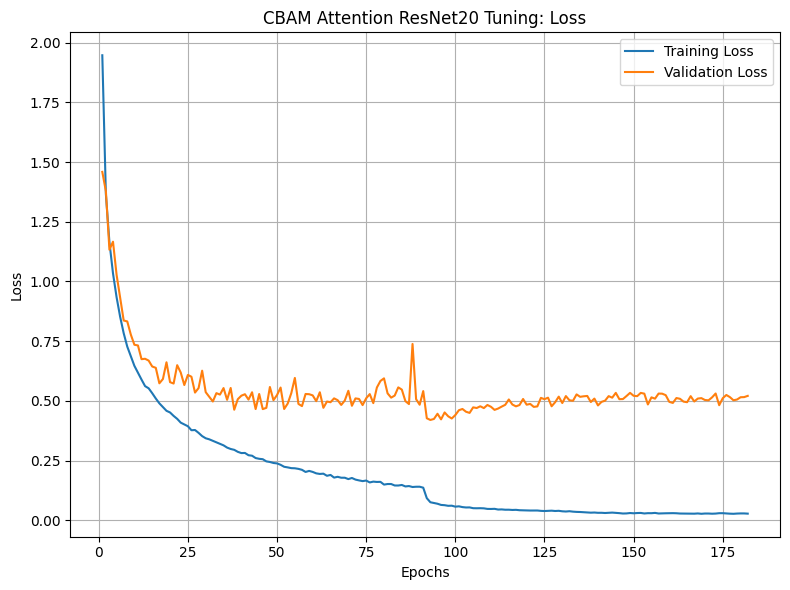

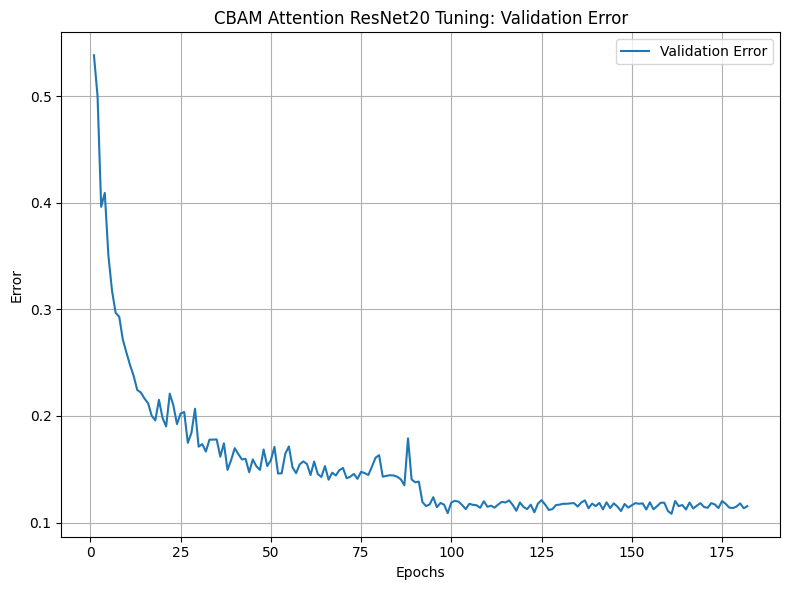

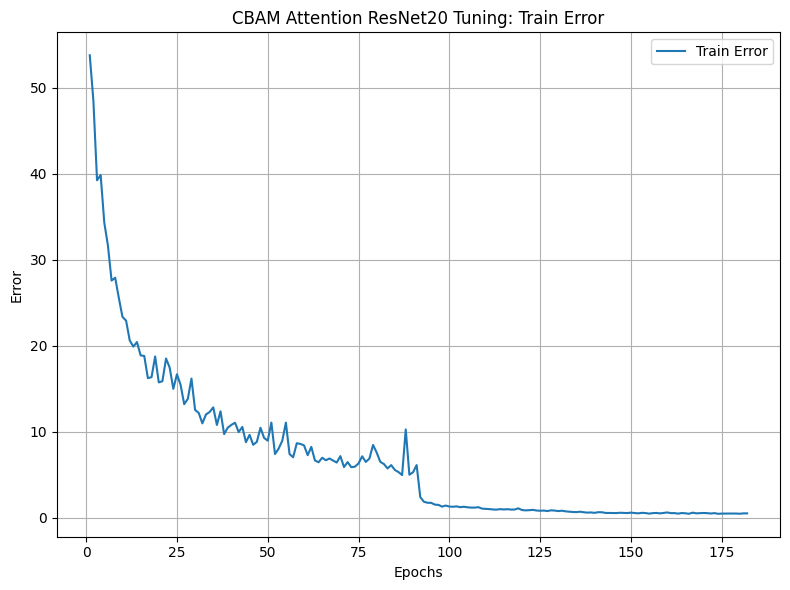

2024/12/07 15:11:00 WARNING mlflow.utils.requirements_utils: Found torchvision version (0.17.1+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torchvision==0.17.1' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2024/12/07 15:11:00 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [5]:
pipeline_template.main('cbam_resnet20_tuning', True, config)
# pipeline_template.main('debug_config')